In [3]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [4]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [5]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.DNK.value(shrinkage_type="linear", window_size=365 * 20)

In [6]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=0,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [7]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [13:55<00:00,  2.95s/it]


StrategyStatistics:
* final_nav = 10.273809
* geom_avg_total_r = 0.130350
* geom_avg_xs_r = 0.122572
* std_xs_r = 0.141685
* min_xs_r = -0.093990
* max_xs_r = 0.090550
* skew = -0.180650
* kurtosis = 17.079977
* max_dd = -0.279182
* sharpe = 0.865101
* alpha_buy_hold = 0.052779
* tracking_error_buy_hold = 0.144870
* ir_buy_hold = 0.364319
* factor_loadings = {'low_risk': 0.569316486942625, 'momentum': -0.07887369169225383, 'quality': 0.12794375235413796, 'size': 0.06294550479436997, 'value': -0.22383201036535602, 'spx': 0.7209405764096245}
* alpha_benchmark = 0.053602
* alpha_benchmark_pvalue = 0.004480
* tracking_error_benchmark = 0.079018
* ir_benchmark = 0.678350
* ttest_pval = 0.278639
* levene_pval = 0.000000
* timing_ability_coef = -0.031105
* timing_ability_pval = 0.040259

In [8]:
result.std_xs_r, result.sharpe

(0.14168490446735071, 0.8651014386324845)

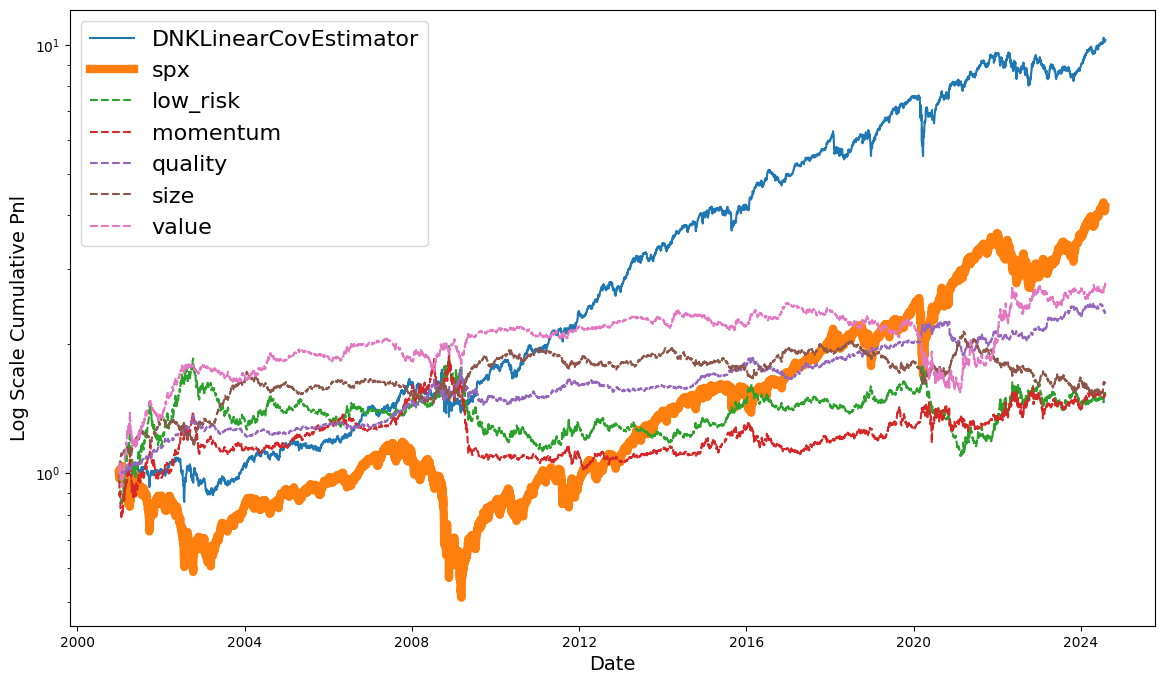

In [9]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

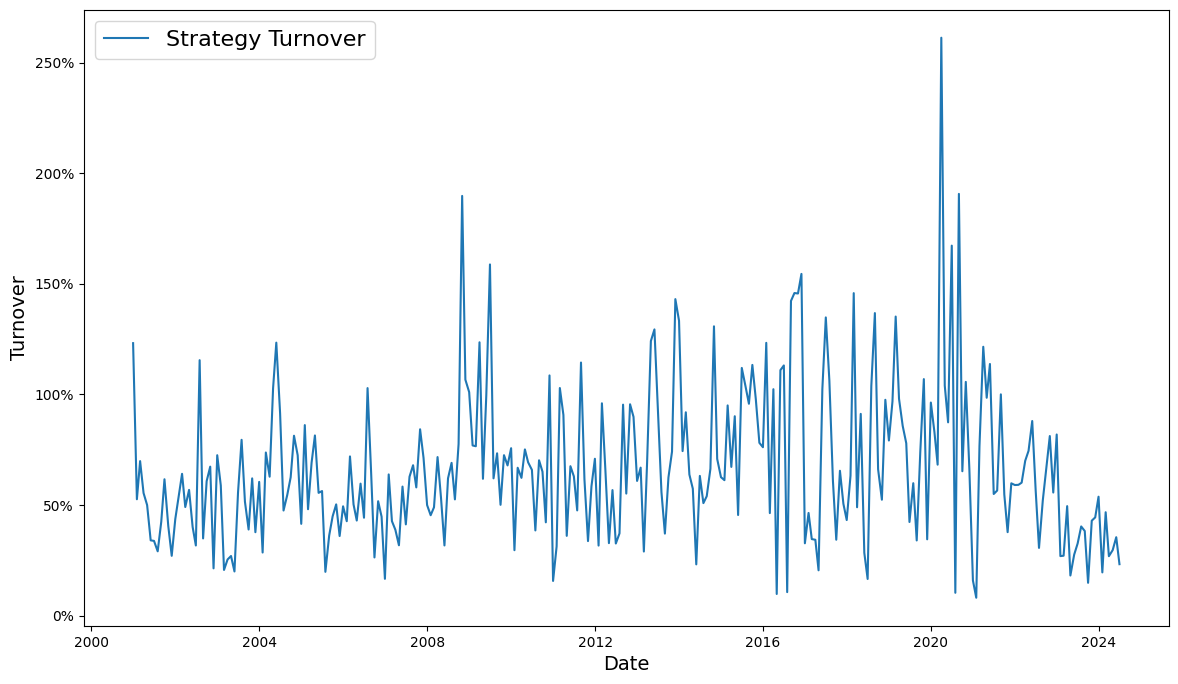

In [10]:
runner.plot_turnover()

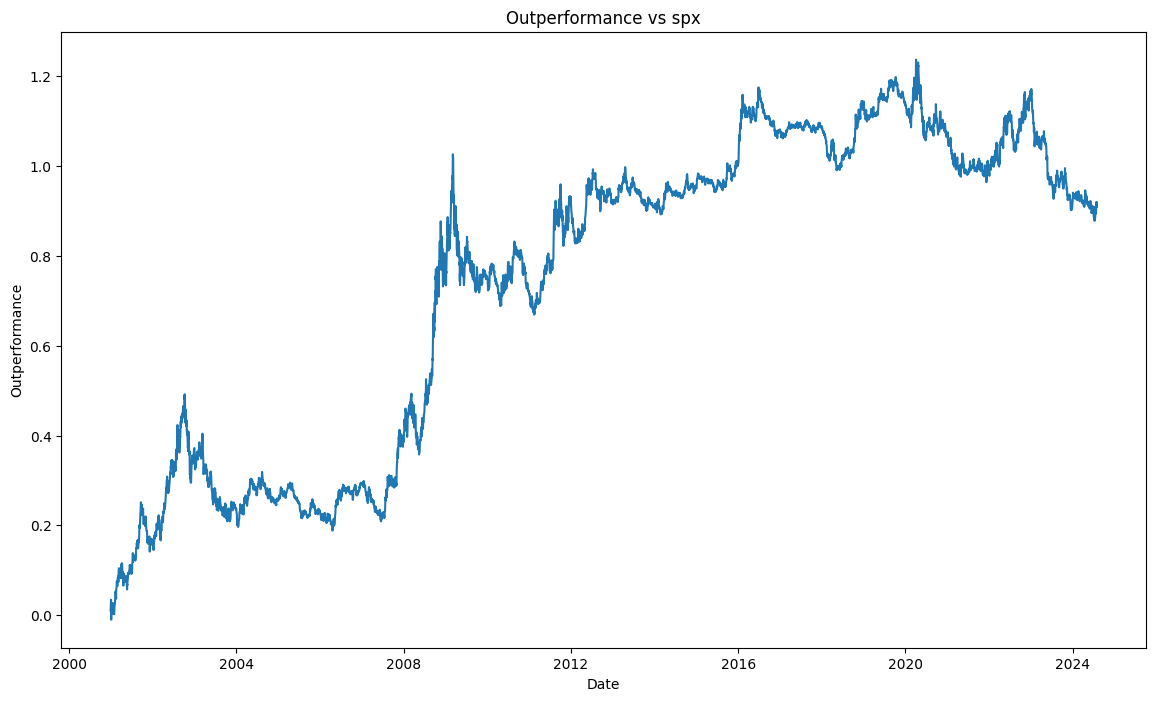

In [11]:
runner.plot_outperformance(mkt_only=True)

In [12]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")